<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/Clicks_ABTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written By : Abiola D. Obembe
## Date : 1st August 2022
### Topic:AB Test on Advert Campaign Clicks

In [2]:
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")


libraries installed succesfully!


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 13.6 MB/s 
     |████████████████████████████████| 9.8 MB 26.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=873491e5bad2d5b99efc4bca985621850fc63bb751a854e9993e58586a35a5a4
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=69500fa36ce3b57e75d799e2cca823cd0e53aac019821c98efa3c3ae5ed31a16
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
# read dataframe
df = pd.read_csv('advertisement_clicks.csv')
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [5]:
# Check for missing values
df.isnull().sum()

advertisement_id    0
action              0
dtype: int64

In [6]:
# Extract datafrme information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   advertisement_id  2000 non-null   object
 1   action            2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
# Lets summarize the data
df.groupby('advertisement_id').sum()

,action
advertisement_id,
A,304
B,372


## Campaign A

In [8]:
# Lets summarize the data for each add campaign by clickor no-click percentage
df_a = df[ df['advertisement_id'] == 'A']
df_a.head()


,advertisement_id,action
2,A,0
4,A,1
5,A,0
7,A,1
9,A,0


In [9]:
df_a['action'].value_counts()

0    696
1    304
Name: action, dtype: int64

In [10]:
# Percntage of clicks
y = (df_a.action
 .mul(100)
 .mean()  
)

print("Percentage of clicks for advertisement campaign A is :", str(y)+'%' )

Percentage of clicks for advertisement campaign A is : 30.4%


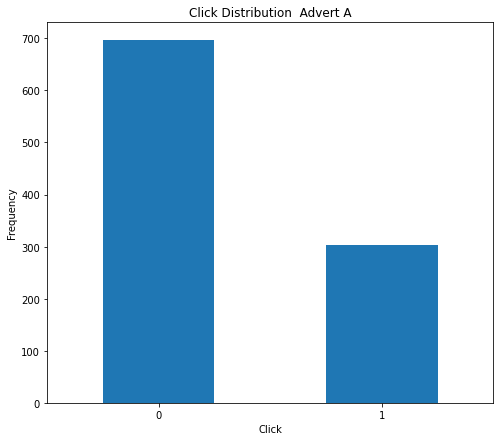

In [30]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_a['action'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Click Distribution  Advert A")
plt.xticks(range(2))
plt.xlabel("Click")
plt.ylabel('Frequency')
plt.show()

## Campaign B

In [11]:
# Lets summarize the data for each add campaign by clickor no-click percentage
df_b = df[ df['advertisement_id'] == 'B']
df_b.head()

,advertisement_id,action
0,B,1
1,B,1
3,B,0
6,B,0
8,B,0


In [17]:
df_b['action'].value_counts()

pandas.core.series.Series

In [13]:
# Percntage of clicks
y = (df_b.action
 .mul(100)
 .mean()  
)

print("Percentage of clicks for advertisement campaign B is :", str(y)+'%' )

Percentage of clicks for advertisement campaign B is : 37.2%


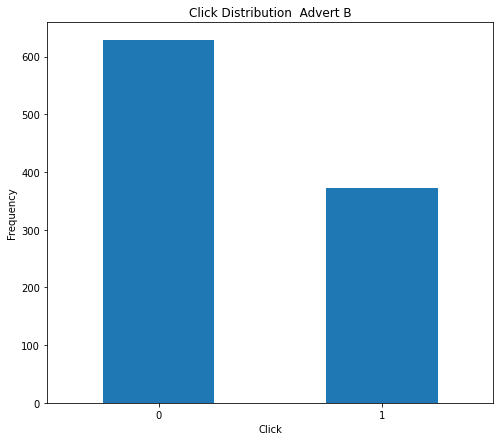

In [31]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_b['action'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Click Distribution  Advert B")
plt.xticks(range(2))
plt.xlabel("Click")
plt.ylabel('Frequency')
plt.show()

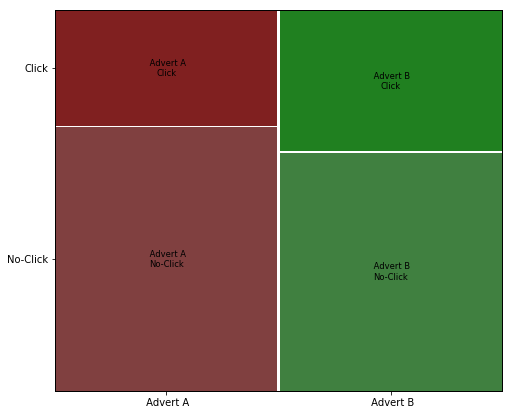

In [14]:
# VISUALIZE BOTH DATA
df_dict = { (' Advert A' , 'No-Click') : 696, (' Advert A' , 'Click') : 304,
           (' Advert B' , 'No-Click') : 628 , (' Advert B' , 'Click') : 372
    
}

mosaic(df_dict)
plt.show()

# Perform Statistical Tests

## Fisher’s exact test

Fisher’s exact test is a statistical test used for testing the association between the two independent categorical variables. It is a non-parametric test and compares the proportion of categories in categorical variables.

In [21]:
# Assemble dataframe for test
y_a = df_a.action.value_counts() 
y_b = df_b.action.value_counts()

df = pd.DataFrame({'A': [y_a[0],y_a[1]],   'B' :[y_b[0],y_b[1]]},
                    index = pd.Index(['no-click', 'click']))

df.head()

,A,B
no-click,696,628
click,304,372


In [22]:
# Perform Fisher's exact test (two-sided)
oddsr, p = fisher_exact(table=df.to_numpy(), alternative='two-sided')
oddsr, p

(1.3561850486087832, 0.00152999119732109)

## Conclusion

The p value (two-tailed) obtained from Fisher’s exact test is significant [p = 0.00153, Odds ratio = 1.36] is statistically significant (p < 0.05) and therefore, we reject the null hypothesis. Thus, we can conclude that there is a significant association between the advert and click status.

# mannwhitneyu method 

In [25]:
# prepare advert A data
df_a.reset_index(drop = True, inplace= True)

df_a.head()

,advertisement_id,action
0,A,0
1,A,1
2,A,0
3,A,1
4,A,0


In [26]:
# prepare advert B data
df_b.reset_index(drop = True, inplace= True)

df_b.head()

,advertisement_id,action
0,B,1
1,B,1
2,B,0
3,B,0
4,B,0


In [27]:
# Carrying out the Wilcoxon–Mann–Whitney test (two-sided)
results = mannwhitneyu(df_a['action'], df_b['action'])
results

MannwhitneyuResult(statistic=466000.0, pvalue=0.0013108294159419323)

## Conclusion

The p value (two-tailed) obtained from mannwhitney test is significant [p = 0.00131, statistics = 466000] is statistically significant (p < 0.05) and therefore, we reject the null hypothesis. Thus, we can conclude that there is a significant association between the advert and click status.

In [34]:
# Carrying out the Wilcoxon–Mann–Whitney test (one-sided)
results = mannwhitneyu(df_a['action'], df_b['action'], alternative= 'less')
results

MannwhitneyuResult(statistic=466000.0, pvalue=0.0006554147079709661)

# Conclusion
The p value (one-tailed) obtained from mannwhitneytest is significant [p = 0.00006, t-statistics = 466000] is statistically significant (p < 0.05) and therefore, we reject the null hypothesis. Thus, we can conclude that the mean of the distribution underlying the df_a (i.e. first sample) is less than the mean of the distribution underlying the df_b (i.e. second sample)

# T-Test Method

In [28]:
ttest_ind(df_a.action, df_b.action, 
          equal_var=True,
          nan_policy='omit', permutations=None, random_state=None, alternative='two-sided')

Ttest_indResult(statistic=-3.2211732138019786, pvalue=0.0012971905467125246)

## Conclusion

The p value (two-tailed) obtained from t-test is significant [p = 0.0013, t-statistics = -3.22] is statistically significant (p < 0.05) and therefore, we reject the null hypothesis. Thus, we can conclude that there is a significant association between the advert and click status

In [32]:
# Peforming a one-sided test
ttest_ind(df_a.action, df_b.action, 
          equal_var=True,
          nan_policy='omit', permutations=None, random_state=None, alternative='less')

Ttest_indResult(statistic=-3.2211732138019786, pvalue=0.0006485952733562623)

## Conclusion

The p value (one-tailed) obtained from t-test is significant [p = 0.00006, t-statistics = -3.22] is statistically significant (p < 0.05) and therefore, we reject the null hypothesis. Thus, we can conclude that the mean of the distribution underlying the df_a (i.e. first sample) is less than the mean of the distribution underlying the df_b (i.e. second sample).


In [33]:
# Peforming a one-sided test
ttest_ind(df_a.action, df_b.action, 
          equal_var=True,
          nan_policy='omit', permutations=None, random_state=None, alternative='greater')

Ttest_indResult(statistic=-3.2211732138019786, pvalue=0.9993514047266437)